In [1]:
#Develop prediction models about the price of the car using the variables or features

#I want to know if the dealer is offering fair value for my trade-in?
#Have I put a fair value on my car?

#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Path of data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
#Use linear regression for data modelling Y=a+bX

#Load the modules for linear regression

from sklearn.linear_model import LinearRegression

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(

In [4]:
#Create the linear regression object

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
#How could Highway-mpg help predict the car price?

#Using linear regression,a linear function will be created 
#with "highway-mpg" as the predictor variable and the "price" as the response variable

X = df[['highway-mpg']]
Y = df['price']

In [6]:
#Fit the linear model using highway-mpg

lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
#I can output a prediction

Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [8]:
#Value of the intercept (a)

lm.intercept_

38423.3058581574

In [9]:
#Value of the Slope (b)

lm.coef_

array([-821.73337832])

In [10]:
#The final estimated model is price = 38423.31 - 821.73 x highway-mpg

In [11]:
#Multiple linear regression --𝑌=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋3+𝑏4𝑋4

#Developing a model using horsepower, curb-weight, engine-size, highway-mpg variables as the predictor variables

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [12]:
#Fit the linear model using the four above-mentioned variables

lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
#Value of the intercept (a)

lm.intercept_

-15806.624626329194

In [14]:
#Values of the coefficients (b1, b2, b3, b4)

lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [15]:
#The linear fuction  from the above results is,
#Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight 
#+ 81.95906216 x engine-size + 33.58258185 x highway-mpg

In [16]:
#Model Evaluation using Visualization

#Import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

(0.0, 48265.118670009535)

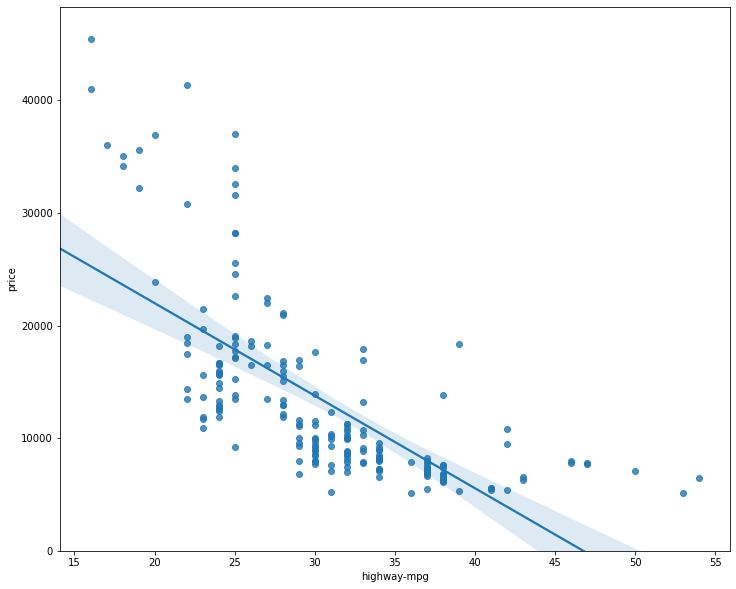

In [17]:
#Visualization of highway-mpg as potential predictor variable of price

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

In [18]:
#Price is negatively correlated to highway-mpg, since the regression slope is negative. 

(0.0, 47414.1)

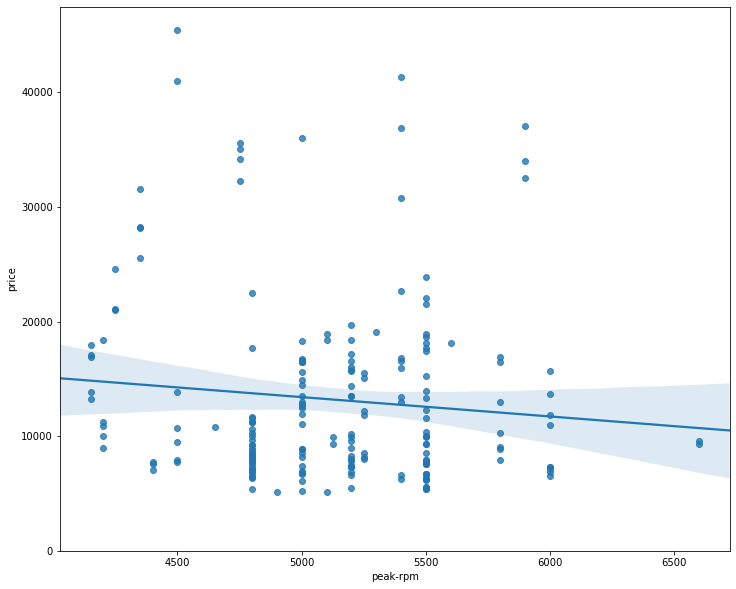

In [19]:
#Regression plot of "peak-rpm" with "price"

plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [20]:
#Comparing the regression plot of "peak-rpm" and "highway-mpg" it can be noticed that 
#the points for "highway-mpg" are much closer to the generated line and on the average decrease.

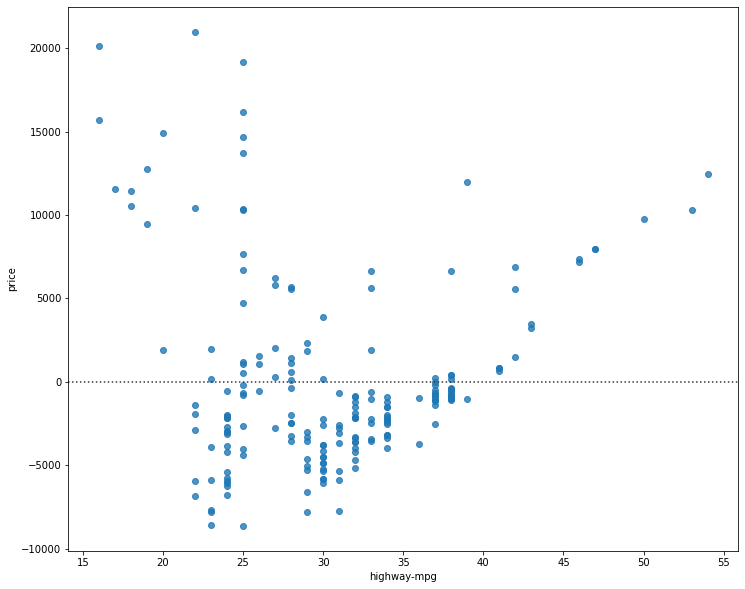

In [21]:
#Residual Plot

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

In [22]:
#From the above residual plot it can be seen that the residuals are not randomly spread around the x-axis, 
#this means that maybe a non-linear model is more appropriate for this data.

In [23]:
#Multiple Linear Regression Visualisation

#Prediction
Y_hat = lm.predict(Z)

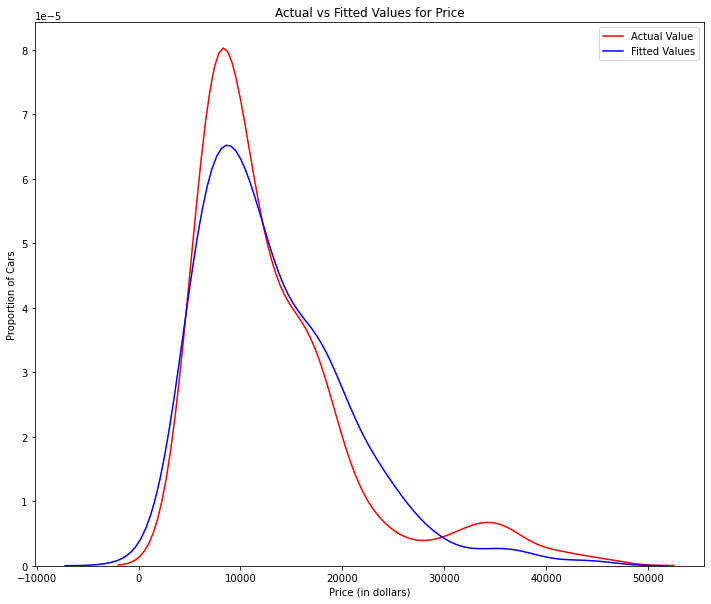

In [24]:
#Distribution plot

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [25]:
#The fitted values are reasonably close to the actual values, since the two distributions overlap a bit. 
#However, there is definitely some room for improvement.

In [26]:
#Polynomial Regression and Pipelines 𝑌=𝑎+𝑏1𝑋+𝑏2𝑋^2

#Polynomial model to plot the data using the below function

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [27]:
#Get Variables

x = df['highway-mpg']
y = df['price']

In [28]:
#Fit the polynomial using the function polyfit

f = np.polyfit(x, y, 3)

In [29]:
#Function poly1d to display the polynomial function

p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


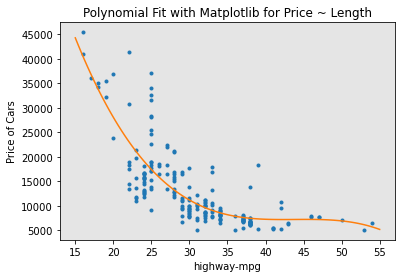

In [30]:
#Plot function

PlotPolly(p, x, y, 'highway-mpg')

In [31]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [32]:
#From the above plot it can be noticed that polynomial model performs better than the linear model
#because generated polynomial function  "hits" more of the data points.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


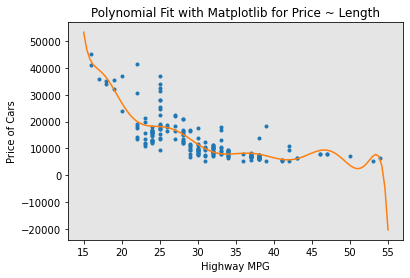

In [33]:
#11 order polynomial model with the variables x and y from above

f1=np.polyfit(x,y,11)
p1=np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [34]:
#Perform a polynomial transform on multiple features

from sklearn.preprocessing import PolynomialFeatures

In [35]:
#Create a PolynomialFeatures object of degree 2

pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [36]:
Z_pr=pr.fit_transform(Z)
Z.shape
Z_pr.shape

(201, 15)

In [37]:
#Use Data Pipelines to simplify the steps of processing the data

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [38]:
#Create the pipeline, by creating a list of tuples 
#including the name of the model or estimator and its corresponding constructor.

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [39]:
#Input the list as an argument to the pipeline constructor

pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [40]:
#Normalize the data, perform a transform and fit the model simultaneously

pipe.fit(Z,y)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [41]:
##Normalize the data, perform a transform and fit the model simultaneously

ypipe=pipe.predict(Z)
ypipe[0:4]

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [42]:
#Model1 Evaluation- Determine how accurate the model is using the methods R^2 / R-squared, Mean Squared Error (MSE)

#Highway_mpg_fit

lm.fit(X, Y)

# Find the R^2-indicates how close the data is to the fitted regression line

print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [43]:
#Calculate the MSE-measures the average of the squares of errors

Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [44]:
#Import the function mean_squared_error from the module metrics

from sklearn.metrics import mean_squared_error

In [45]:
#Compare the predicted results with the actual results

mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


In [46]:
#Model 2-Multiple Linear Regression

# Fit the model 

lm.fit(Z, df['price'])

#Find the R^2

print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [47]:
#Produce a prediction

Y_predict_multifit = lm.predict(Z)

In [48]:
#Compare the predicted results with the actual results

print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [49]:
#Model 3: Polynomial Fit

#Calculate the R^2

#Import the function r2_score from the module metrics

from sklearn.metrics import r2_score

In [50]:
#Apply the function to get the value of r^2

r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

#Approxiamtely 67.419 % of the variation of price is explained by this polynomial fit

The R-square value is:  0.674194666390652


In [51]:
#Calculate the MSE

mean_squared_error(df['price'], p(x))

20474146.426361214

In [52]:
#Prediction and Decision Making

#Import pyplot for plotting and numpy to use some functions

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [53]:
#Create a new input

new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [54]:
#Fit the model

lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [55]:
#Produce a prediction

yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

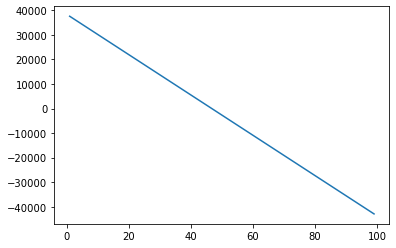

In [56]:
#Plot the data

plt.plot(new_input, yhat)
plt.show()

In [57]:
#Decision Making: Determining a Good Model Fit.

#When comparing models, the model with the higher R-squared value is a better fit for the data.

#When comparing models, the model with the smallest MSE value is a better fit for the data.


#Values for the different models.
#Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

#R-squared: 0.49659118843391759
#MSE: 3.16 x10^7
#Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

#R-squared: 0.80896354913783497
#MSE: 1.2 x10^7
#Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

#R-squared: 0.6741946663906514
#MSE: 2.05 x 10^7



#Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)

#In order to be able to compare the results of the MLR vs SLR models, it must be considered a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

#The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
#R-squared: In this case, there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).


#Simple Linear Model (SLR) vs Polynomial Fit

#MSE: The Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
#R-squared: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.
#Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, leads to the conclusion that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.


#Multiple Linear Regression (MLR) vs Polynomial Fit

#MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
#R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.


#Conclusion:
#Comparing these three models, it is concluded that the MLR model is the best model to be able to predict price from the dataset. This result makes sense, since there are 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.

